# Analisi Best Model prime 100 catture
### Claudia Gabriela Ochoa Martinez (2020)

#### Analizzando il best model fornito dalla funzione pdredge possiamo allora applicare la funzione predict (pacchetto unmarked) per effettuare ulteriori valutazione sulla bontà del modello. sulle prime 100 catture a partire dal 2015

In [1]:
library(unmarked)

Loading required package: lattice



In [2]:
myunscale <- function (vals, norm.data, col.ids)  {
    cols <- if (missing(col.ids)) 1:NCOL(vals) else col.ids
    #if (length(cols) > NCOL(vals)) 
    #    stop("Incorrect dimension of data to unscale.")
    centers <- attr(norm.data, "scaled:center")[cols]
    scales <- attr(norm.data, "scaled:scale")[cols]
    unvals <- scale(vals[,cols], center = (-centers/scales), scale = 1/scales)
    unvals <- cbind(unvals,vals[,-which(names(vals) %in% cols)])
    attr(unvals, "scaled:center") <- attr(unvals, "scaled:scale") <- NULL
    unvals
}

In [3]:
load('Dati-modelli\\10. multimodel_ Occ prime 100.RData')

In [4]:
best_mod <- occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    cop_veg_ottavi + dominant + Esp.tr + 1, data = arvicole, 
    control = list(trace = 0, maxit = 1e+07))
summary(best_mod)



Call:
occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    cop_veg_ottavi + dominant + Esp.tr + 1, data = arvicole, 
    control = list(trace = 0, maxit = 1e+07))

Occupancy (logit-scale):
                 Estimate    SE     z  P(>|z|)
(Intercept)         2.019 0.567  3.56 0.000373
cop_veg_ottavi     -0.781 0.380 -2.06 0.039576
dominantMuschio     0.248 1.378  0.18 0.857473
dominantOther_Sp   -1.247 0.892 -1.40 0.162057
Esp.tr              0.794 0.427  1.86 0.063134

Detection (logit-scale):
            Estimate       SE        z  P(>|z|)
(Intercept)  -4.9589 3.44e-01 -14.4214 3.79e-47
MDR           0.1419 6.88e-02   2.0611 3.93e-02
orarioTr      0.6195 1.51e-01   4.0963 4.20e-05
precip      -16.5727 1.59e+03  -0.0105 9.92e-01
temper        0.0966 2.16e-02   4.4830 7.36e-06
vento         0.2010 6.88e-02   2.9234 3.46e-03

AIC: 1964.015 
Number of sites: 70
optim convergence code: 0
optim iterations: 65 
Bootstrap iterations: 0 



In [5]:
head(siteCovs_orig$dominant)
head(siteCovs(arvicole))

[1] "Graminacee" "Graminacee" "Graminacee" "Graminacee" "Graminacee"
[6] "Graminacee"

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,MDR,IQR,Esp.tr,cop_veg_ottavi,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7999612,0.4449731,0.6121266,-0.9638930,-0.03990354,-0.004945912,0.97220994,0.65969346,-0.7248291,-2.7977585,0.89121078,Graminacee
2,0.7678020,-0.7023655,0.1200460,-1.1064717,0.39997796,0.341267903,0.05432387,0.05605239,0.4943843,-1.1704790,0.41353272,Graminacee
3,-0.9071587,0.2749970,-0.1449204,-1.1156660,0.51727969,-1.505205774,-0.33905587,-0.36649637,-0.8052168,-0.7365377,-0.06414534,Graminacee
4,-0.2639738,-0.9573296,-0.6370010,-1.1130010,0.39264660,-0.581968936,0.97220994,-1.15122977,-0.3764824,-1.1976003,1.13004981,Graminacee
5,0.6070058,-0.7236125,-0.4288130,-1.0064001,0.39997796,-0.235755121,0.70995678,-0.81922717,0.3470069,-1.1704790,-0.06414534,Graminacee
6,0.1514164,-0.9360826,-0.6370010,-0.9597622,0.51727969,-0.697373540,0.57883019,-1.15122977,0.0254561,-0.7365377,1.36888884,Graminacee


In [6]:
siti_considerati <- 70-length(best_mod@sitesRemoved) # In totale, al massimo nelle analisi consideriamo 70 siti, alcuni anni meno
re <- ranef(best_mod)
EBUP <- bup(re, stat="mean")
CI <- confint(re, level=0.90)
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/siti_considerati)

,Estimate,5%,95%
PAO,0.7948451,0.7857143,0.8714286


,cop_veg_ottavi,Esp.tr,dominant
,<dbl>,<dbl>,<fct>
1,-1.258340,-4.031219e-17,Graminacee
2,-1.219740,-4.031219e-17,Graminacee
3,-1.181140,-4.031219e-17,Graminacee
4,-1.142540,-4.031219e-17,Graminacee
5,-1.103939,-4.031219e-17,Graminacee
6,-1.065339,-4.031219e-17,Graminacee


,cop_veg_ottavi,Esp.tr,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,6.076768,-22.84286,0.2535224,0.1912938,0.04474251,0.7112022,Other_Sp
296,6.141414,-22.84286,0.2478587,0.1904685,0.04259280,0.7093878,Other_Sp
297,6.206061,-22.84286,0.2422804,0.1895781,0.04053489,0.7076045,Other_Sp
298,6.270707,-22.84286,0.2367882,0.1886239,0.03856585,0.7058514,Other_Sp
299,6.335354,-22.84286,0.2313824,0.1876072,0.03668275,0.7041279,Other_Sp
300,6.400000,-22.84286,0.2260635,0.1865296,0.03488269,0.7024332,Other_Sp


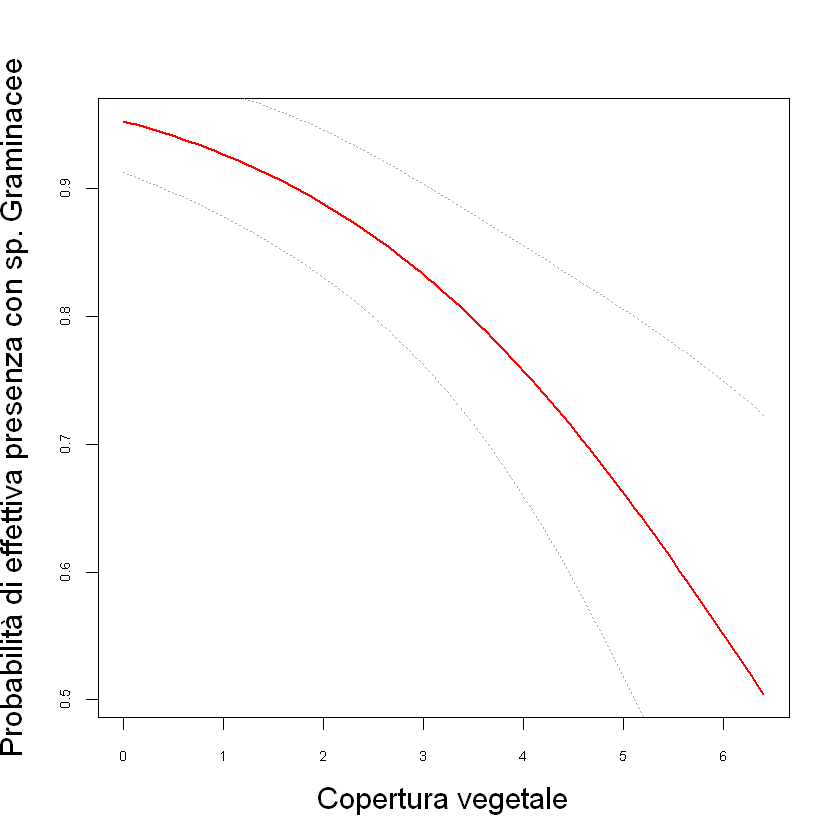

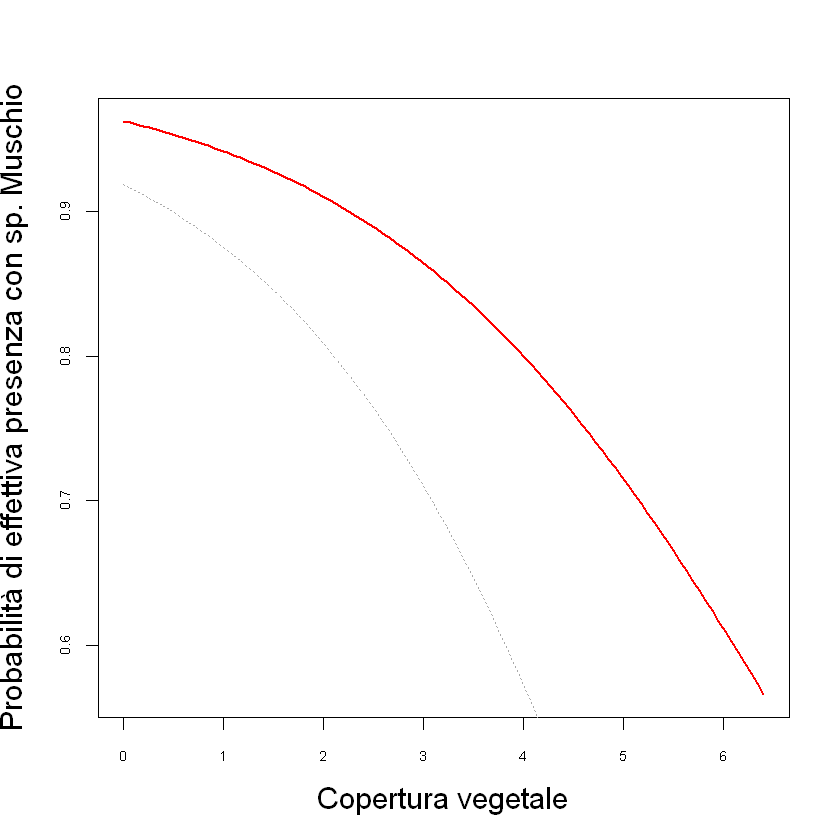

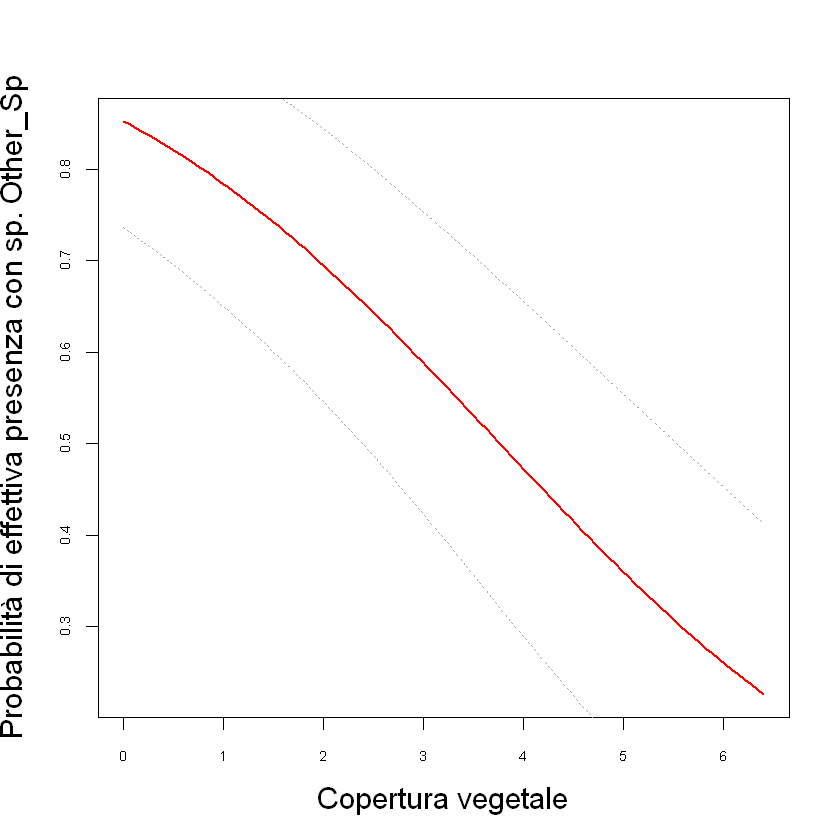

In [14]:
# Predict abundance at specified covariate values.
df_indicato <- siteCovs(arvicole)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)

newdat_graminacee <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = mean(df_indicato$Esp.tr),
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = mean(df_indicato$Esp.tr),
    dominant = "Muschio"
)
newdat_other <- data.frame(
    cop_veg_ottavi = cop_veg_ottavi.seq,
    Esp.tr = mean(df_indicato$Esp.tr),
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)
head(newdata)

Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("cop_veg_ottavi","Esp.tr"))
tail(Elambda_unscaled)

### grafici per cop_veg_ottavi
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
  #lines(cop_veg_ottavi, upper, lty=1, col="grey")
  #lines(cop_veg_ottavi, lower, lty=1, col="grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
  #lines(cop_veg_ottavi, upper, lty=1, col="grey")
  #lines(cop_veg_ottavi, lower, lty=1, col="grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(cop_veg_ottavi, Predicted, xlab="Copertura vegetale", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(cop_veg_ottavi, Predicted+SE, lty=3, col="dark grey")
   lines(cop_veg_ottavi, Predicted-SE, lty=3, col="dark grey")
  #lines(Esp.tr, upper, lty=1, col="grey")
  #lines(Esp.tr, lower, lty=1, col="grey")
})

,cop_veg_ottavi,Esp.tr,dominant
,<dbl>,<dbl>,<fct>
1,-1.201544e-16,-2.797759,Graminacee
2,-1.201544e-16,-2.746255,Graminacee
3,-1.201544e-16,-2.694752,Graminacee
4,-1.201544e-16,-2.643249,Graminacee
5,-1.201544e-16,-2.591746,Graminacee
6,-1.201544e-16,-2.540243,Graminacee


,cop_veg_ottavi,Esp.tr,Predicted,SE,lower,upper,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
295,2.107429,52.50505,0.9163238,0.07706781,0.6042960,0.9874255,Other_Sp
296,2.107429,54.40404,0.9194052,0.07568265,0.6064580,0.9882970,Other_Sp
297,2.107429,56.30303,0.9223828,0.07430038,0.6085168,0.9891132,Other_Sp
298,2.107429,58.20202,0.9252594,0.07292157,0.6104775,0.9898771,Other_Sp
299,2.107429,60.10101,0.9280376,0.07154684,0.6123449,0.9905914,Other_Sp
300,2.107429,62.00000,0.9307203,0.07017686,0.6141236,0.9912589,Other_Sp


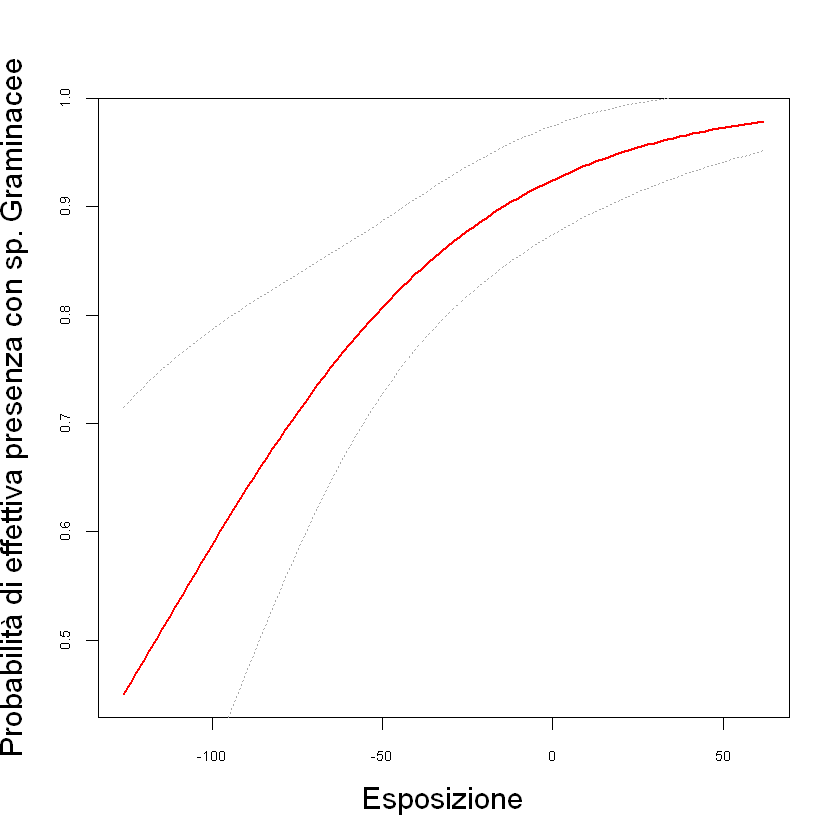

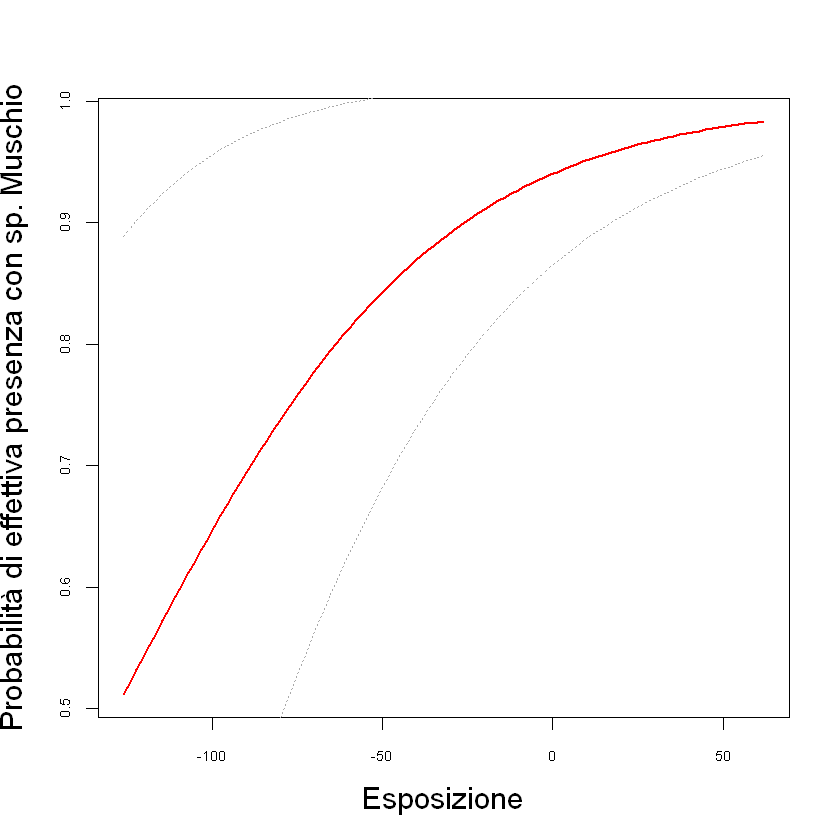

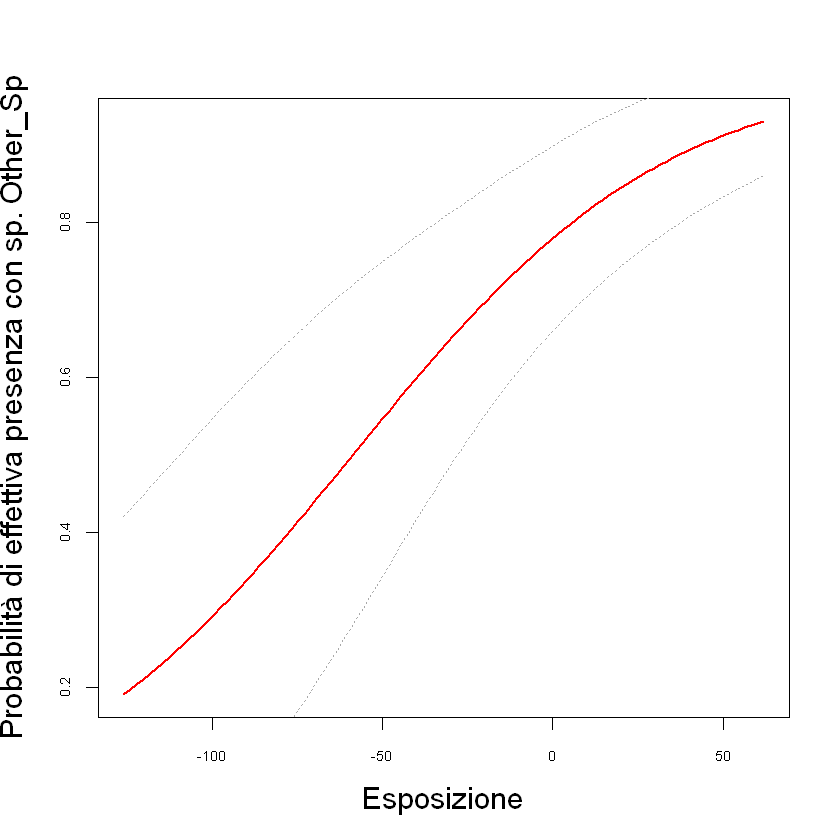

In [8]:
# Predict abundance at specified covariate values.
df_indicato <- siteCovs(arvicole)
cop_veg_ottavi.seq <- seq(min(df_indicato$cop_veg_ottavi, na.rm=TRUE), max(df_indicato$cop_veg_ottavi, na.rm=TRUE), length=100)
Esp.tr.seq <- seq(min(df_indicato$Esp.tr), max(df_indicato$Esp.tr), length=100)

newdat_graminacee <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    Esp.tr = Esp.tr.seq,
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    Esp.tr = Esp.tr.seq,
    dominant = "Muschio"
)
newdat_other <- data.frame(
    cop_veg_ottavi = mean(df_indicato$cop_veg_ottavi, na.rm=TRUE),
    Esp.tr = Esp.tr.seq,
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)
head(newdata)

Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("cop_veg_ottavi","Esp.tr"))
tail(Elambda_unscaled)

### grafici per Esposizione
with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(Esp.tr, Predicted, xlab="Esposizione", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
   lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
  #lines(cop_veg_ottavi, upper, lty=1, col="grey")
  #lines(cop_veg_ottavi, lower, lty=1, col="grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(Esp.tr, Predicted, xlab="Esposizione", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
   lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
  #lines(MDR, upper, lty=1, col="grey")
  #lines(MDR, lower, lty=1, col="grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(Esp.tr, Predicted, xlab="Esposizione", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=1.5, cex.axis=0.7, lwd=2, col="red")
   lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
   lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
  #lines(Esp.tr, upper, lty=1, col="grey")
  #lines(Esp.tr, lower, lty=1, col="grey")
})

### Proseguiamo con ulteriori valutazioni sulla temperatura, precipitazioni, vento ed orario di cattura

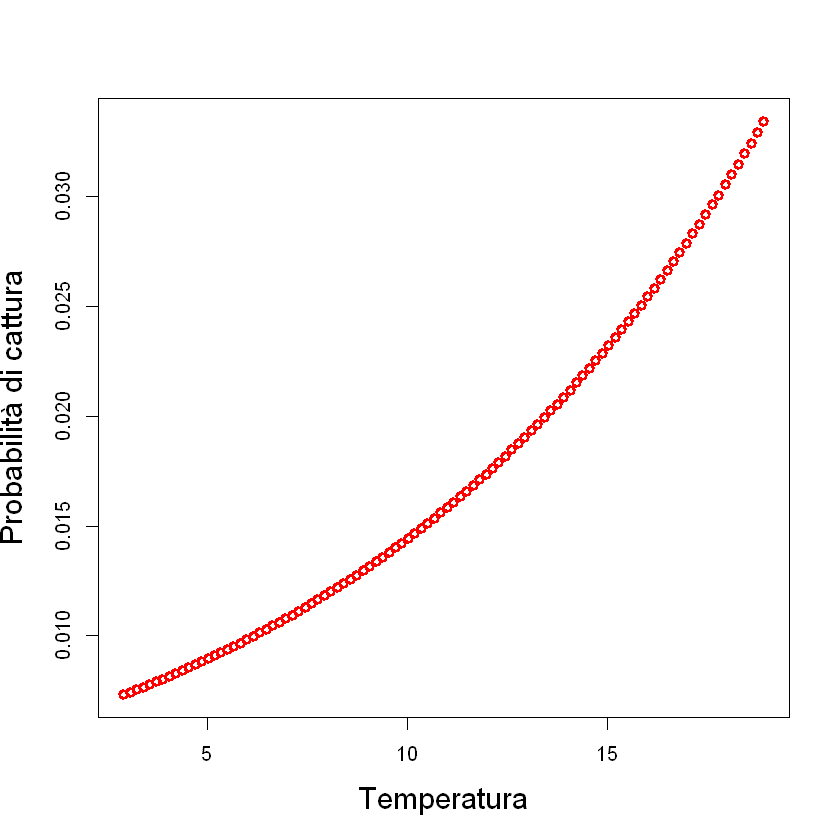

In [9]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = temper.seq,
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = mean(df_indicato2$precip)
)


Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))

with(Elambda_unscaled, {
    plot(temper, Predicted, xlab="Temperatura", type="b",
        ylab="Probabilità di cattura",
        cex.lab=1.5, lwd=3, col="red")
    lines(temper , Predicted+SE, lty=3, col="dark grey")
    lines(temper , Predicted-SE, lty=3, col="dark grey")
})  

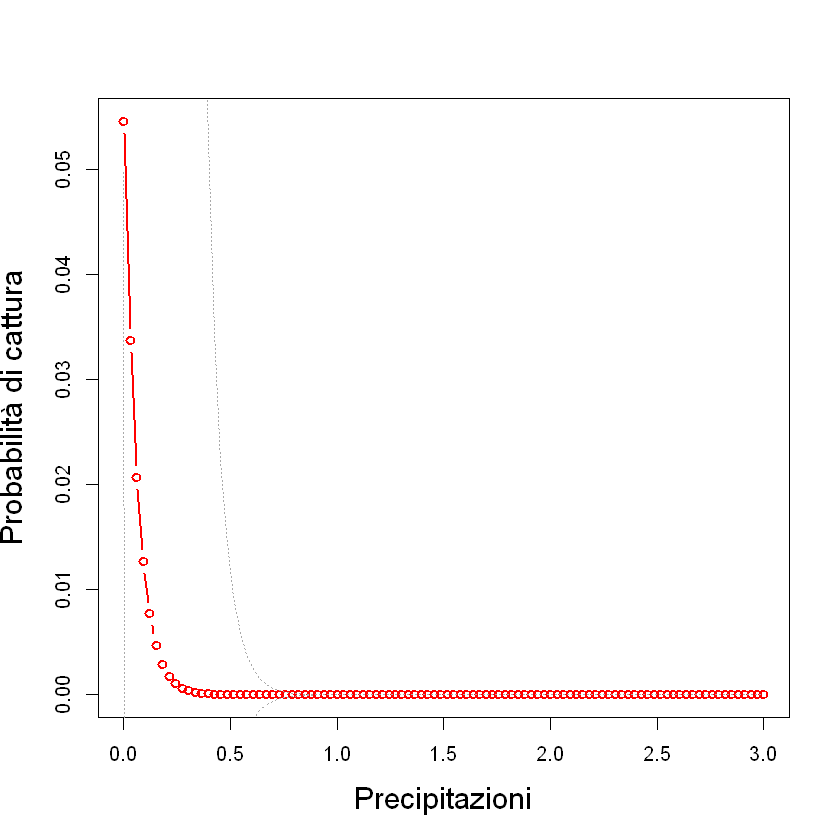

In [13]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = mean(df_indicato2$temper),
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = precip.seq
)


Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))

with(Elambda_unscaled, {
    plot(precip, Predicted, xlab="Precipitazioni", type="b",
        ylab="Probabilità di cattura",
        cex.lab=1.5, lwd=2, col="red")
    lines(precip , Predicted+SE, lty=3, col="dark grey")
   lines(precip , Predicted-SE, lty=3, col="dark grey")
})  